In [ ]:
from preprocessing import *
from word_swap import *
from activations import *
import torch
from transformers import AutoTokenizer,AutoModel,pipeline
from nltk.corpus import brown
import matplotlib
import matplotlib.pyplot as plt

# Laod a custom color map for better visualization
from scipy.io import loadmat
colormap = loadmat('colormap-custom-lightblue-to-yellow1.mat')['cmap']
colormap = matplotlib.colors.ListedColormap(colormap)
# model_type = "gpt2"
# model_type = "Stancld/longt5-tglobal-large-16384-pubmed-3k_steps"
model_type = "google/long-t5-tglobal-large"
tokenizer = AutoTokenizer.from_pretrained(
    model_type, add_special_token=False)
model = AutoModel.from_pretrained(model_type)


In [38]:

inputs = tokenizer("I like cheese", return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    model.eval()
    outputs = model(**inputs)
    print(outputs[0].shape)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /local_scratch/19317317/ipykernel_37980/1913074359.py:4 in <module>                              │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/local_scratch/19317317/ipykernel_37980/1913074359.py'     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: LongT5Model(
  (shared): Embedding(32128, 1024)
  (encoder): LongT5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): LongT5Block(
        (layer): ModuleList(
          (0): LongT5LayerTransientGlobalSelfAttention(
            (TransientGlobalSelfAttention): LongT5TransientGlobalAttention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
              (global_relative_attention_bias): Embedding(32, 16)
              (global_input_layer_norm): LongT5LayerNorm()
            )
            (layer_norm): LongT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): LongT5LayerFF(
            (DenseReluDense): LongT5DenseGatedActDense(
              (wi_0): Linear(in_features=1024, out_features=2816, bias=False)
              (wi_1): Linear(in_features=1024, out_features=2816, bias=False)
              (wo): Linear(in_features=2816, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): NewGELUActivation()
            )
            (layer_norm): LongT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (1-23): 23 x LongT5Block(
        (layer): ModuleList(
          (0): LongT5LayerTransientGlobalSelfAttention(
            (TransientGlobalSelfAttention): LongT5TransientGlobalAttention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (global_input_layer_norm): LongT5LayerNorm()
            )
            (layer_norm): LongT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): LongT5LayerFF(
            (DenseReluDense): LongT5DenseGatedActDense(
              (wi_0): Linear(in_features=1024, out_features=2816, bias=False)
              (wi_1): Linear(in_features=1024, out_features=2816, bias=False)
              (wo): Linear(in_features=2816, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): NewGELUActivation()
            )
            (layer_norm): LongT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (final_layer_norm): LongT5LayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (decoder): LongT5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): LongT5Block(
        (layer): ModuleList(
          (0): LongT5LayerSelfAttention(
            (SelfAttention): LongT5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): LongT5LayerNorm()
            (drop

In [ ]:

overall_integration_corpus = Corpus(brown,single_token_words=False,tokenizer=tokenizer)
natural_sequences_1000 = overall_integration_corpus.get_natural_sequences_of_length(200)


In [2]:
len(natural_sequences_1000)

319

In [3]:
tokenizer.encode("I like cheese")

[27, 114, 3285, 1]

In [8]:
tokenizer.encode("well she like dog")

[168, 255, 114, 1782, 1]

In [14]:
test =  tokenizer.encode("I like cheese",return_tensors="pt")
test

tensor([[  27,  114, 3285,    1]])

In [35]:
model.eval()

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [33]:
?tokenizer

Signature:     
tokenizer(
    text: Union[str, List[str], List[List[str]]] = None,
    text_pair: Union[str, List[str], List[List[str]], NoneType] = None,
    text_target: Union[str, List[str], List[List[str]]] = None,
    text_pair_target: Union[str, List[str], List[List[str]], NoneType] = None,
    add_special_tokens: bool = True,
    padding: Union[bool, str, transformers.utils.generic.PaddingStrategy] = False,
    truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy] = None,
    max_length: Optional[int] = None,
    stride: int = 0,
    is_split_into_words: bool = False,
    pad_to_multiple_of: Optional[int] = None,
    return_tensors: Union[str, transformers.utils.generic.TensorType, NoneType] = None,
    return_token_type_ids: Optional[bool] = None,
    return_attention_mask: Optional[bool] = None,
    return_overflowing_tokens: bool = False,
    return_special_tokens_mask: bool = False,
    return_offsets_mapping: bool = False,
    return_length:

In [36]:
model(tokenizer.encode("I like cheese",return_tensors="pt"))

BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[-0.0796, -0.0654, -0.0842,  ..., -0.1442, -0.0456,  0.0142],
         [-0.0426, -0.3873, -0.3798,  ..., -0.1628,  0.2764,  0.2956],
         [-0.1300, -0.2194, -1.0970,  ...,  0.2605,  0.2838,  0.5272]]],
       grad_fn=<ViewBackward0>), past_key_values=((tensor([[[[-1.5577,  2.0585,  1.3060,  ..., -1.3825, -0.6334,  1.2624],
          [-2.5532,  2.6298,  1.7484,  ..., -0.8992, -1.2752,  1.8641],
          [-1.6259,  2.9258,  1.0358,  ..., -1.9360, -1.5299,  2.3821]],

         [[-0.1191, -0.4702, -1.8900,  ..., -0.6026,  1.1491,  0.0967],
          [-0.0626, -1.6803, -1.1090,  ..., -1.3674,  3.1353,  1.0499],
          [-2.4061, -2.2275, -0.9426,  ..., -1.2059,  4.4912, -0.5682]],

         [[ 0.1191, -0.0143,  0.6525,  ..., -1.1654, -1.5703,  0.8032],
          [ 0.4019,  0.3482,  1.3205,  ..., -2.6333, -0.0954,  1.9793],
          [ 1.5669, -0.7506, -1.6028,  ..., -2.7963,  0.0237,  0.1729]],

         ...,

     

In [30]:
from transformers import LongT5ForConditionalGeneration
model_test = LongT5ForConditionalGeneration.from_pretrained(model_type)

In [31]:
model_test(test)
tokenizer.decode(model_test.generate(test)[0])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /local_scratch/19317317/ipykernel_37980/411663211.py:1 in <module>                               │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/local_scratch/19317317/ipykernel_37980/411663211.py'      │
│                                                                                                  │
│ /scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/module. │
│ py:1522 in _wrapped_call_impl                                                                    │
│                                                                                                  │
│   1519 │   │   if self._compiled_call_impl is not None:                                          │
│   1520 │   │   │   return self._compiled_call_impl(*args, **kwargs)  # type: ignore[misc]        │
│   1521 │   │   else:                                                                             │
│ ❱ 1522 │   │   │   return self._call_impl(*args, **kwargs)                                       │
│   1523 │                                                                                         │
│   1524 │   def _call_impl(self, *args, **kwargs):                                                │
│   1525 │   │   forward_call = (self._slow_forward if torch._C._get_tracing_state() else self.fo  │
│                                                                                                  │
│ /scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/module. │
│ py:1531 in _call_impl                                                                            │
│                                                                                                  │
│   1528 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1529 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1530 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1531 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1532 │   │                                                                                     │
│   1533 │   │   try:                                                                              │
│   1534 │   │   │   result = None                                                                 │
│                                                                                                  │
│ /scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/transformers/models/long │
│ t5/modeling_longt5.py:2050 in forward                                                            │
│                                                                                                  │
│   2047 │   │   │   decoder_input_ids = self._shift_right(labels)                                 │
│   2048 │   │                                                                                     │
│   2049 │   │   # Decode                                                                          │
│ ❱ 2050 │   │   decoder_outputs = self.decoder(                                                   │
│   2051 │   │   │   input_ids=decoder_input_ids,                                                  │
│   2052 │   │   │   attention_mask=decoder_attention_mask,                                        │
│   2053 │   │   │   inputs_embeds=decoder_inputs_embeds,                                          │
│                                                                                                  │
│ /scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/module. │
│ py:1522 in _wrapped_call_impl                              

In [5]:
unmasker = pipeline('fill-mask',model = 'bert-large-uncased-whole-word-masking',top_k=100,device='cpu')
overall_integration_swapper = ProbableWordSwap(unmasker,idx_low = 0,idx_high = 10,excluded_token_ids = [1])

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:

overall_integration_swapper(natural_sequences_1000[:10])


0it [00:00, ?it/s]

In [7]:
overall_integration_swapper.original_sequences

[['heres',
  'an',
  'idea',
  'for',
  'a',
  'childs',
  'room',
  'that',
  'is',
  'easy',
  'to',
  'execute',
  'and',
  'is',
  'completely',
  'charming',
  'using',
  'puppets',
  'for',
  'lamp',
  'bases',
  'most',
  'children',
  'love',
  'the',
  'animated',
  'puppet',
  'faces',
  'and',
  'their',
  'flexible',
  'bodies',
  'and',
  'they',
  'prefer',
  'to',
  'see',
  'them',
  'as',
  'though',
  'the',
  'puppets',
  'were',
  'in',
  'action',
  'rather',
  'than',
  'put',
  'away',
  'in',
  'boxes',
  'displayed',
  'as',
  'lamps',
  'the',
  'puppets',
  'delight',
  'the',
  'children',
  'and',
  'are',
  'decorative',
  'accent',
  'to',
  'create',
  'such',
  'a',
  'lamp',
  'order',
  'a',
  'wired',
  'pedestal',
  'from',
  'any',
  'lamp',
  'shop',
  'measure',
  'the',
  'puppet',
  'to',
  'determine',
  'the',
  'height',
  'of',
  'the',
  'light',
  'socket',
  'allowing',
  'three',
  'to',
  'four',
  'inches',
  'above',
  'the',
  'pupp

In [37]:

def get_activations(
    dfs,
    model,
    wte_only = True,
    device='cuda'):

    """Gets activations for a list of DataFrames.

    Args:
        dfs (list): list of DataFrames
        model: Huggingface model
        wte_only (bool): whether to only use the WTE layer (only supported for GPT2 models)
        device (str): device to use for the model (e.g., 'cpu', 'cuda')
    
    Returns:
        results (torch.Tensor): tensor of activations with shape (n_layers, n_sequences, n_words, n_features)
    """

    if model.config.model_type != "gpt2" and wte_only:
        warnings.warn("wte_only is only supported for GPT2 models. Setting wte_only to False.")
        wte_only = False

    model.to(device)
    model.eval()
    results = []

    for df in dfs:
        df["word_index"] = np.arange(len(df))
        with torch.no_grad():
            inpt = torch.tensor(list(itertools.chain.from_iterable(df['tokens']))).reshape(1,-1)
            inpt = inpt.to(model.device)
            out = model(inpt, output_hidden_states=True, decoder_input_ids=inpt)
            out1 = torch.stack(out.encoder_hidden_states)
            out2 = torch.stack(out.decoder_hidden_states)
            out = torch.cat([out1,out2],dim=0)
            if wte_only:
                out[0] = model.base_model.wte.forward(inpt)[None]
            out = out.cpu()

        out = aggregate_tokens(df,out.squeeze())
        results.append(out)
    results = torch.stack(results,dim=1)
    return results


def calculate_differences(swapped_seqs,original_seqs,tokenizer,model,device='cuda',excluded_token_ids = []):
    """Calculates the differences for a list of swapped and original sequences.

    Args:
        swapped_seqs (list): list of lists of swapped sequences
        original_seqs (list): list of original sequences
        tokenizer: Huggingface tokenizer
        model: Huggingface model
        device (str): device to use for the model (e.g., 'cpu', 'cuda')

    Returns:
        out (torch.Tensor): tensor of differences with shape (n_layers, swap position, measured position, n_features)
    """

    out = None
    n = 0
    for zz,(swapped,original) in tqdm(enumerate(zip(swapped_seqs,original_seqs))):
        try:
            swapped_dfs = []
            for s in swapped:
                df = text_to_df(s,tokenizer=tokenizer,excluded_token_ids=excluded_token_ids)
                swapped_dfs.append(df)
            original_df = text_to_df(original,tokenizer=tokenizer,excluded_token_ids=excluded_token_ids)
            swapped_activations = get_activations(swapped_dfs,model=model,device=device)
            original_activations = get_activations([original_df],model=model,device=device)

            if (swapped_activations is not None) and (original_activations is not None):
                difference = torch.abs(swapped_activations - original_activations)
                if out is None:
                    out = difference
                else:
                    out += difference
                n += 1
        except ValueError:
            print("Error: ",zz,original)
            continue
    print("Finished calculating difference tensor for ",n," sequences")
    return out/n

In [38]:

differences = calculate_differences(overall_integration_swapper.swapped,
                                    overall_integration_swapper.original_sequences,
                                    tokenizer,model,device='cuda',excluded_token_ids = [1])


0it [00:00, ?it/s]

/local_scratch/19063430/ipykernel_55090/1810658595.py:20: UserWarning: wte_only is only supported for GPT2 models. Setting wte_only to False.
  warnings.warn("wte_only is only supported for GPT2 models. Setting wte_only to False.")
/scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/transformers/modeling_utils.py:816: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/transformers/modeling_utils.py:816: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/transformers/modeling_utils.py:816: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/scratch/snormanh_lab/dskrill/envs/pytorch/lib/python3.10/site-packages/transformers/modeling_utils.py:816: Fut

Finished calculating difference tensor for  45  sequences


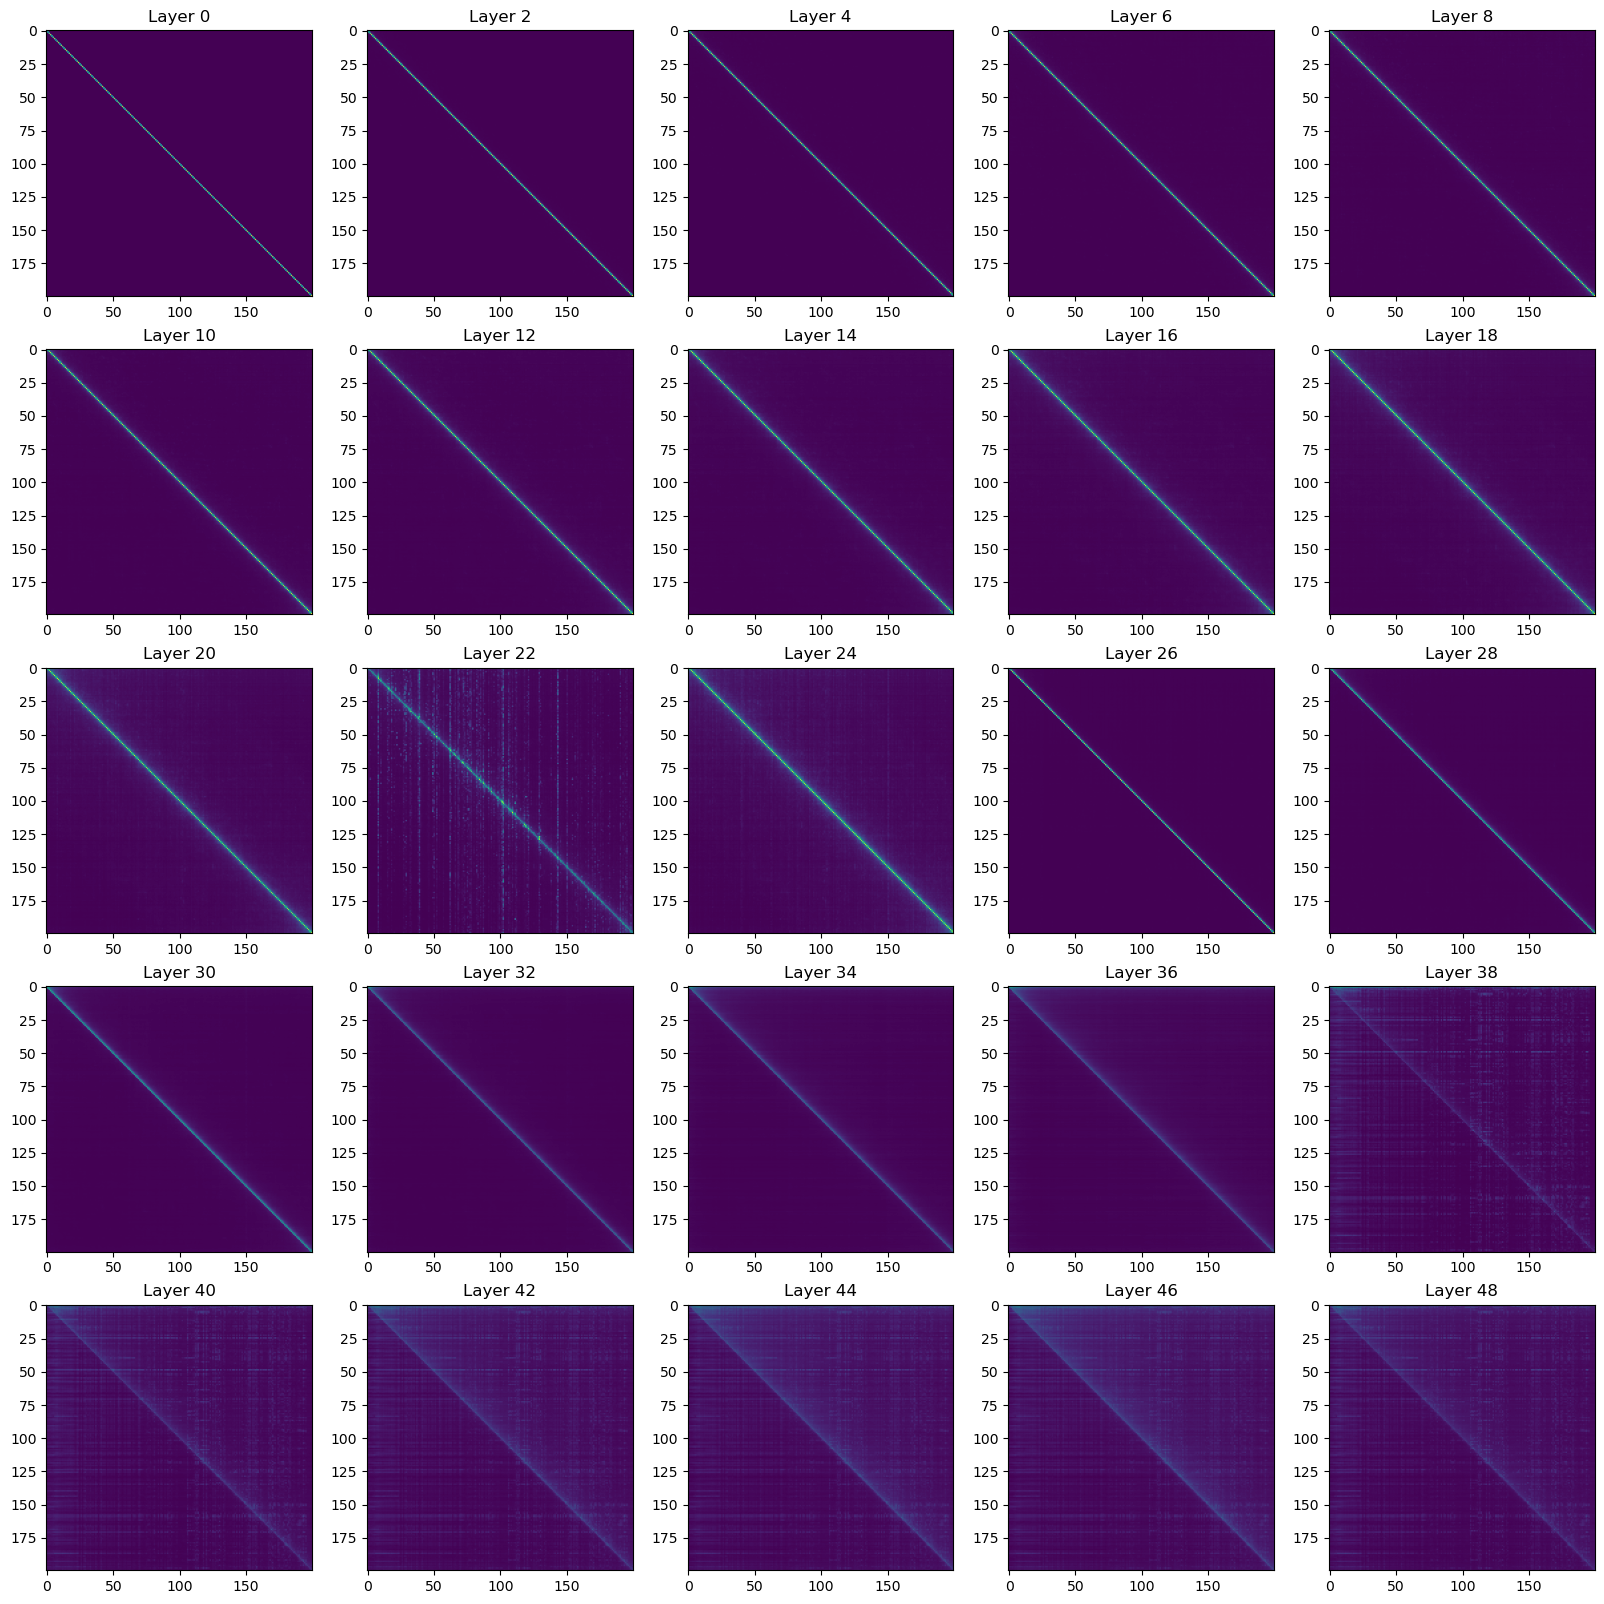

In [44]:
fig,axes = plt.subplots(5,5,figsize=(20,20))
for i,ax in zip(range(0,50,2),axes.flatten()):
    ax.imshow(differences.mean(-1)[i])
    ax.set_title("Layer "+str(i))


In [39]:
differences.shape

torch.Size([50, 200, 200, 1024])

In [ ]:
model_type = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(
    model_type, add_special_token=False,add_prefix_space=True)
model = AutoModel.from_pretrained(model_type)
overall_integration_corpus = Corpus(brown,single_token_words=False,tokenizer=tokenizer)
overall_integration_swapper = RandomPosWordSwap(overall_integration_corpus.word_lookup,
                                                overall_integration_corpus.pos_dict,
                                                tokenizer)
natural_sequences_40 = overall_integration_corpus.get_natural_sequences_of_length(40)
len(natural_sequences_40)
We perform the swap procedure, obtain activations, and calulate the difference:
overall_integration_swapper(natural_sequences_40)
differences = calculate_differences(overall_integration_swapper.swapped,
                                    overall_integration_swapper.original_sequences,
                                    tokenizer,model,device='cuda')